<a href="https://colab.research.google.com/github/Herdvair/Eksperimen-Hyperparameter-Tuning/blob/main/Eksperimen_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Understanding

In [ ]:
df = pd.read_csv('/content/churn.csv')

In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def data_understanding(df : object) -> object:
    print('\n ===== Shape =====')
    print(df.shape)

    print('\n ===== Info =====')
    df.info()

    print('\n ===== Describe =====')
    print(df.describe())

    print('\n ===== Missing Value =====')
    print(df.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(df.drop_duplicates())/len(df))

In [ ]:
data_understanding(df)


 ===== Shape =====
(7046, 12)

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB

 ===== Describe =====
       SeniorCitizen       Tenure  MonthlyCharges  TotalCharges
count    7034.000000  7029.000000     7036.0

Dataset Overview :

- Ukuran dimensi data churn yaitu sebanyak 7046 baris data dan 12 kolom.
- Tipe data di dataset ini terdiri dari object dan float
- Missing value (NaN) yang berhasil diidentifikasi yaitu di kolom CustomerID (9 data NaN), Gender (16 data NaN), SeniorCitizen (12 data NaN, Partner (16 data NaN), Dependents (19 data NaN), Tenure (17 data NaN), Contract (13 data NaN), PaperlessBilling (13 data NaN), PaymentMethod (11 data NaN), MonthlyCharges (10 data NaN).
- Terdapat data duplikat

In [ ]:
# cek data tidak konsisten
for i in df.columns:
    print(f'===== {i} =====')
    print(df[i].value_counts())

===== customerID =====
customerID
3604-WLABM    2
5067-WJEUN    2
2342-CKIAO    2
5233-GEEAX    2
2905-KFQUV    2
             ..
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
0234-TEVTT    1
2789-HQBOU    1
Name: count, Length: 7023, dtype: int64
===== Gender =====
Gender
Male      3552
Female    3478
Name: count, dtype: int64
===== SeniorCitizen =====
SeniorCitizen
0.0    5892
1.0    1142
Name: count, dtype: int64
===== Partner =====
Partner
No     3638
Yes    3392
Name: count, dtype: int64
===== Dependents =====
Dependents
No     4931
Yes    2096
Name: count, dtype: int64
===== Tenure =====
Tenure
1.0     613
72.0    361
2.0     238
3.0     200
4.0     176
       ... 
38.0     60
28.0     57
39.0     56
44.0     51
36.0     49
Name: count, Length: 72, dtype: int64
===== Contract =====
Contract
Month-to-month    3873
Two year          1689
One year          1471
Name: count, dtype: int64
===== PaperlessBilling =====
PaperlessBilling
Yes    4168
No     2865
Name: count, dtype: int64

In [ ]:
# cek whitespace aja
cek_whitespace = df.apply(lambda x: x.astype(str).str.strip().eq(''))
size_data = df.size
persentase_data_ws = (cek_whitespace.sum().sum() / (size_data)) * 100

In [ ]:
persentase_data_ws

np.float64(0.0)

Tidak ada data tidak konsisten termasuk tidak ada whitespace

# Data Cleaning

In [ ]:
df = df.drop_duplicates()

## Ubah tipe data target

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Missing Value

In [ ]:
#CEK PERSENTASE
exludes_kolom = ['TotalCharges', 'Churn']

cek_missing = [kolom for kolom in df.columns if kolom not in exludes_kolom]

for kolom in cek_missing:
  persentase_missing = (df[kolom].isnull().sum() / len(df)) * 100
  print(f"Kolom {kolom} : {persentase_missing:.2f}%")

Kolom customerID : 0.13%
Kolom Gender : 0.21%
Kolom SeniorCitizen : 0.17%
Kolom Partner : 0.23%
Kolom Dependents : 0.27%
Kolom Tenure : 0.24%
Kolom Contract : 0.18%
Kolom PaperlessBilling : 0.18%
Kolom PaymentMethod : 0.16%
Kolom MonthlyCharges : 0.14%


### Handling Missing Value

In [ ]:
df.dropna(subset=['customerID'], inplace=True)

Dilakukan penghapusan baris yang terindikasi nilai NaN pada kolom customerID karena tidak dilakukan metode imputate karena ditakutkan adanya duplikasi data.

In [ ]:
kategori_cols = ['Gender', 'Partner', 'Dependents','Contract', 'PaperlessBilling', 'PaymentMethod']

for i in kategori_cols:
  print(f"Kolom {i} : {df[i].mode()[0]}")
  df[i].fillna(df[i].mode()[0], inplace=True)
  print("Handling sukses!")

Kolom Gender : Male
Handling sukses!
Kolom Partner : No
Handling sukses!
Kolom Dependents : No
Handling sukses!
Kolom Contract : Month-to-month
Handling sukses!
Kolom PaperlessBilling : Yes
Handling sukses!
Kolom PaymentMethod : Electronic check
Handling sukses!


In [ ]:
num_cols = ['SeniorCitizen', 'Tenure', 'MonthlyCharges']
for i in num_cols:
  print(f"Kolom {i} : {df[i].median()}")
  df[i].fillna(df[i].median(), inplace=True)
  print("Handling sukses!")

Kolom SeniorCitizen : 0.0
Handling sukses!
Kolom Tenure : 29.0
Handling sukses!
Kolom MonthlyCharges : 70.35
Handling sukses!


Dilakukan handling menggunakan median karena distribusi datanya terlihat asimetris

## Outlier

In [ ]:
num_col = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
def check_plot(df):

    for i in num_col:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

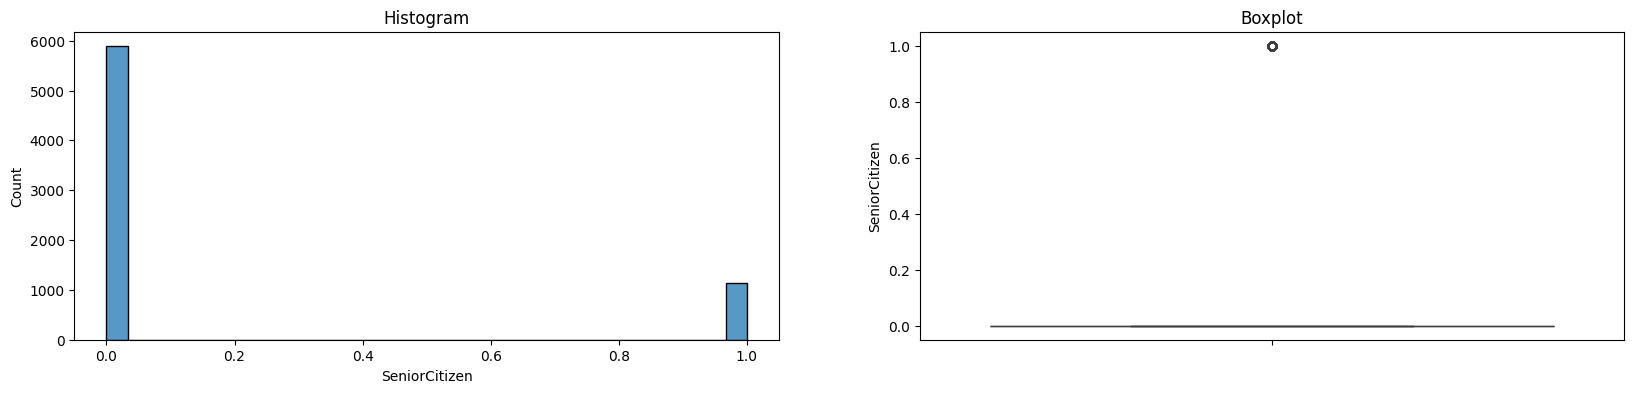

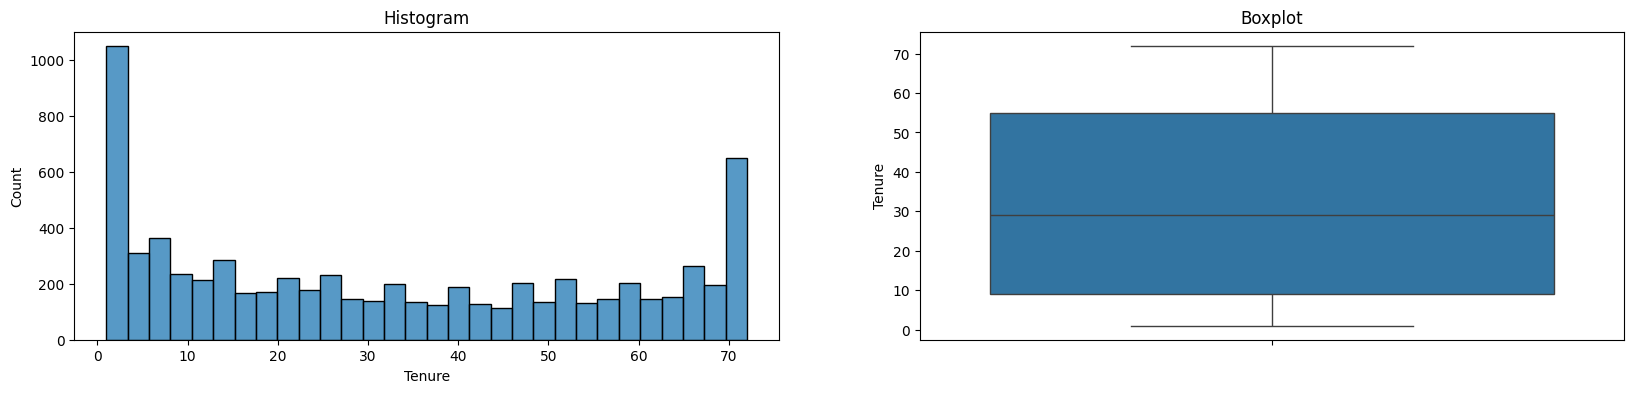

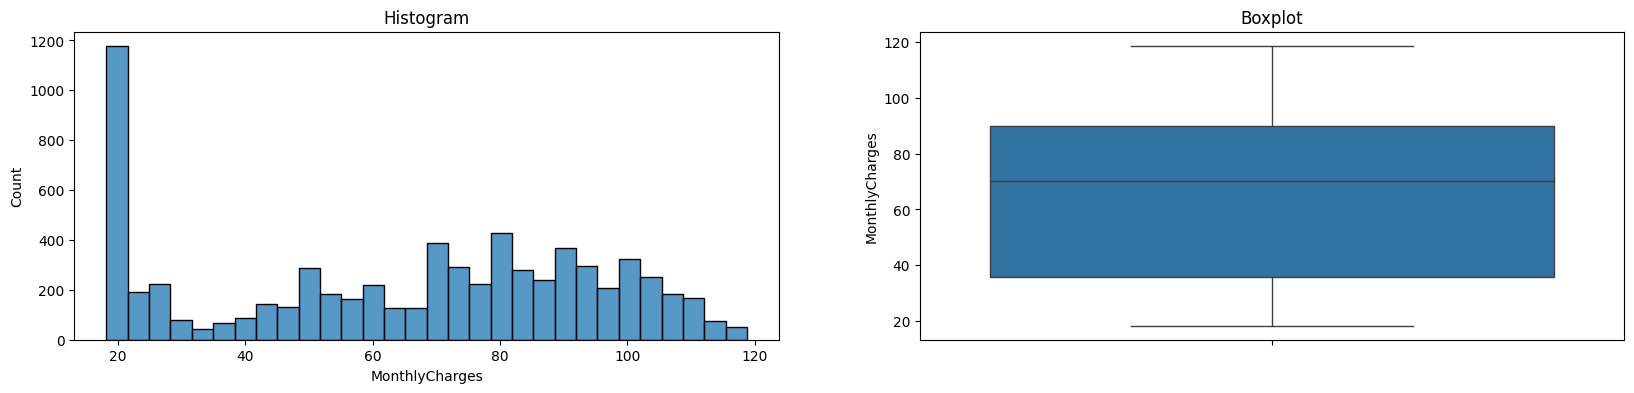

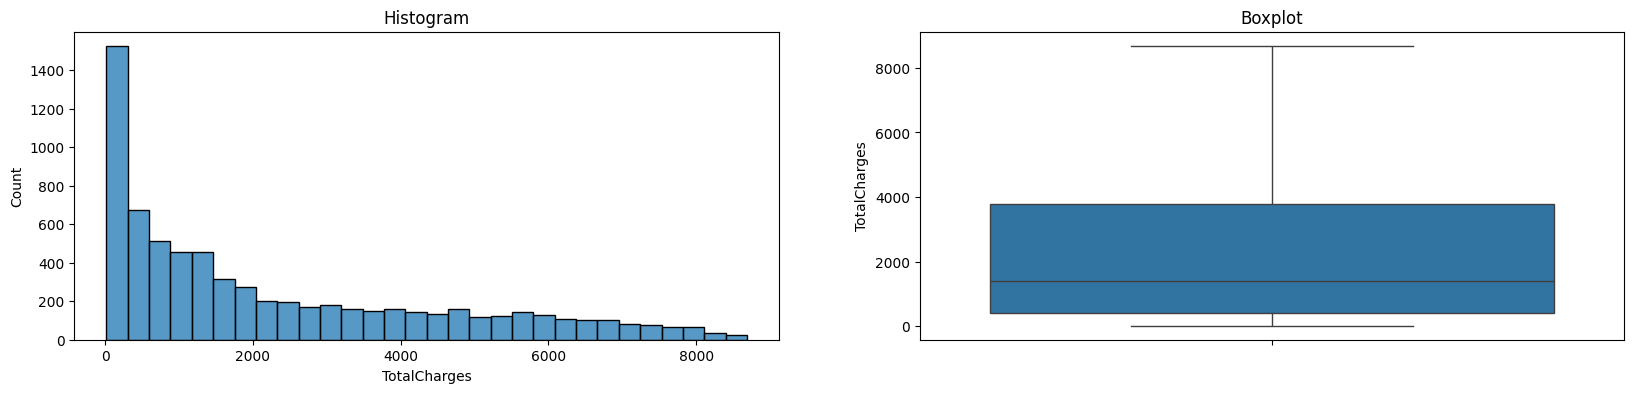

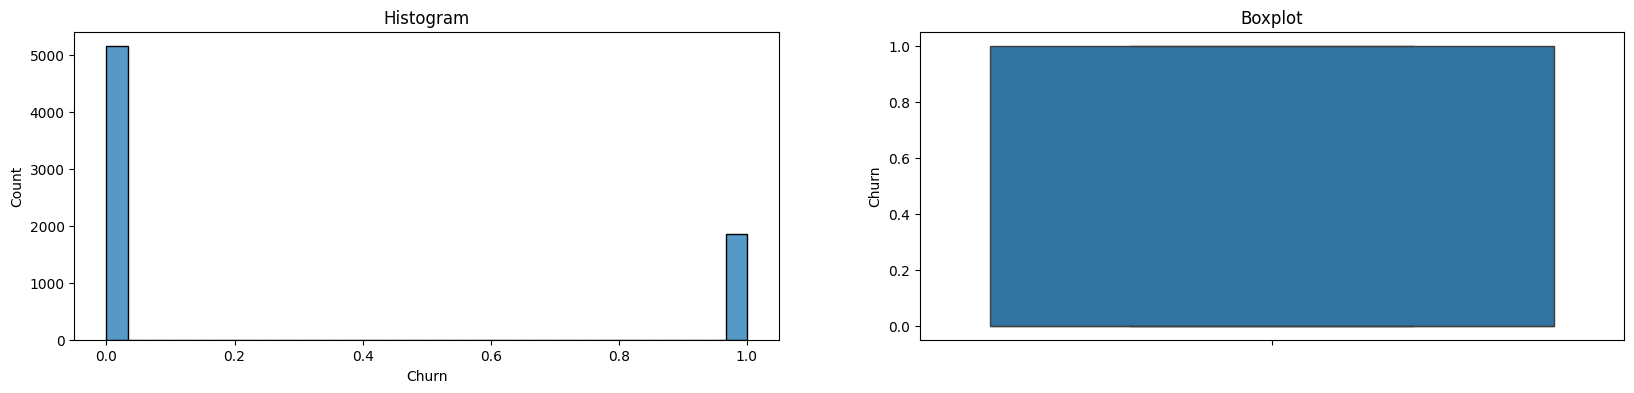

In [ ]:
check_plot(df)

Tidak dilakukan Handling Outlier

In [ ]:
df.shape

(7023, 12)

In [ ]:
df_churn = df.copy()

In [ ]:
df_churn.isna().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0


In [ ]:
print(len(df_churn.drop_duplicates())/len(df_churn))

1.0


# EDA (Exploratory Data Analysis)

In [ ]:
feature = df_churn.drop(['Churn', 'customerID'], axis=1)
target = df_churn['Churn']

Dilakukan split fitur dan target agar lebih mudah memahami objek yang ingin diketahui

## Distribusi Kolom Kategori berdasarkan Churn

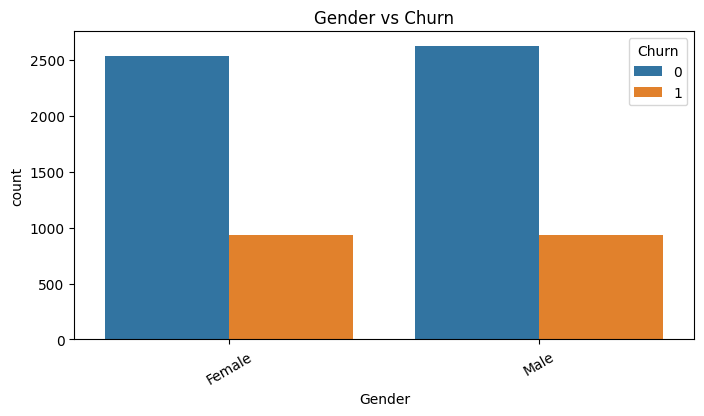

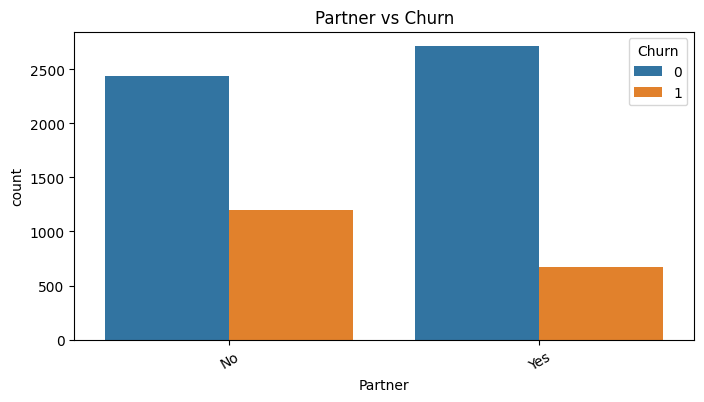

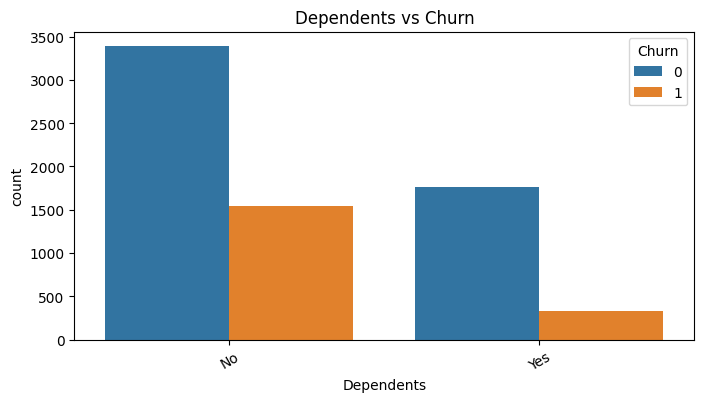

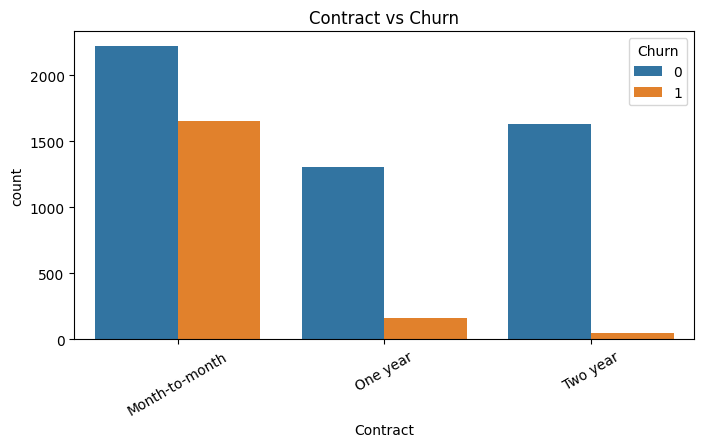

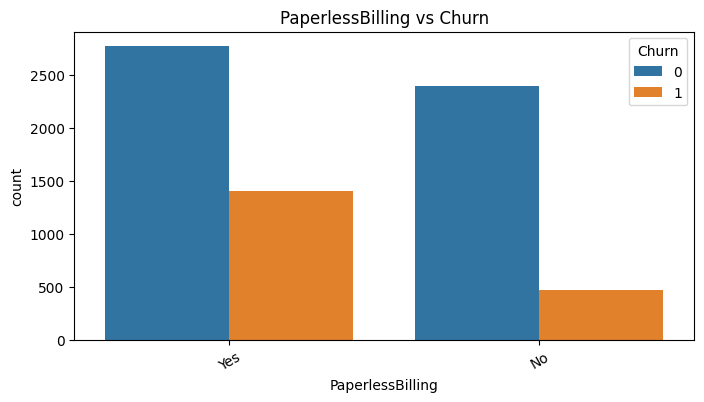

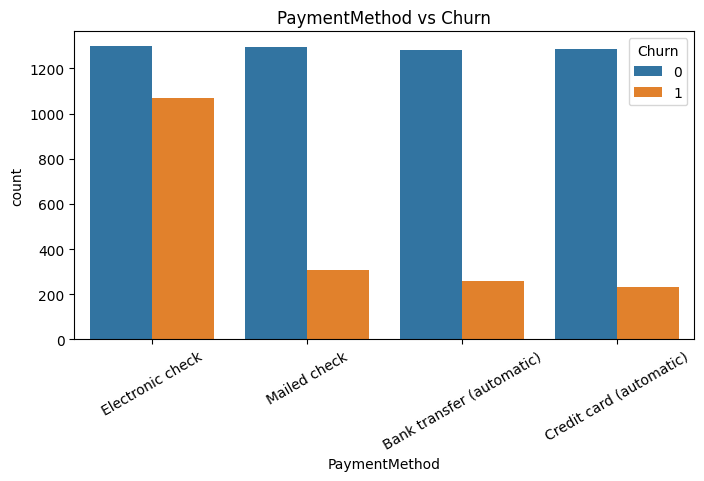

In [ ]:
kategori = feature.select_dtypes(include=['object']).columns

kategori_plot = pd.concat([feature, target], axis=1)

for i in kategori:
  plt.figure(figsize=(8,4))
  sns.countplot(data=kategori_plot, x=i, hue='Churn')
  plt.title(f"{i} vs Churn")
  plt.xticks(rotation=30)
  plt.show()

Insight :

Secara keseluruhan, proporsi pelanggan yang tidak churn lebih mendominasi di semua kategori. Namun, terdapat pola pada beberapa variabel yang menunjukkan bahwa pelanggan dengan kontrak *month to month* dan pelanggan dengan metode pembayaran *electronic check* lebih rentan terhadap churn (meskipun lebih tinggi tidak churn namun harus hati-hati).

## Distribusi Kolom Numerik berdasarkan Churn

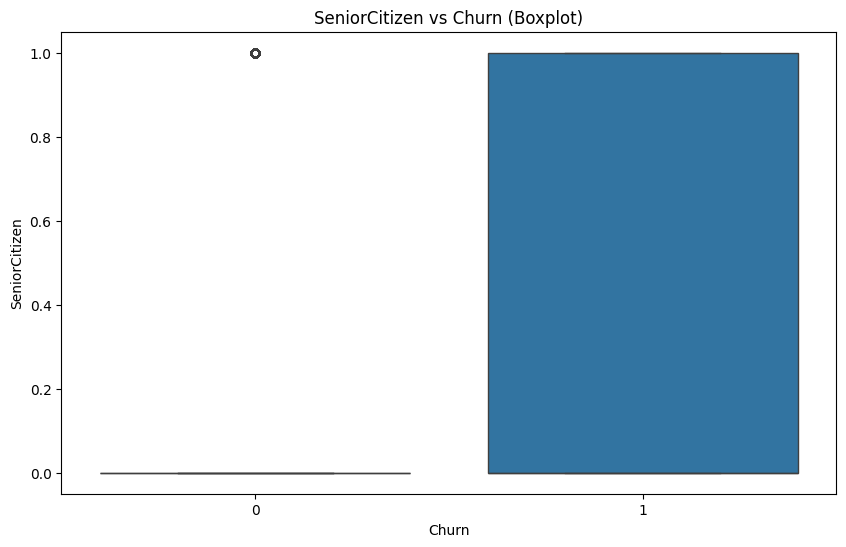

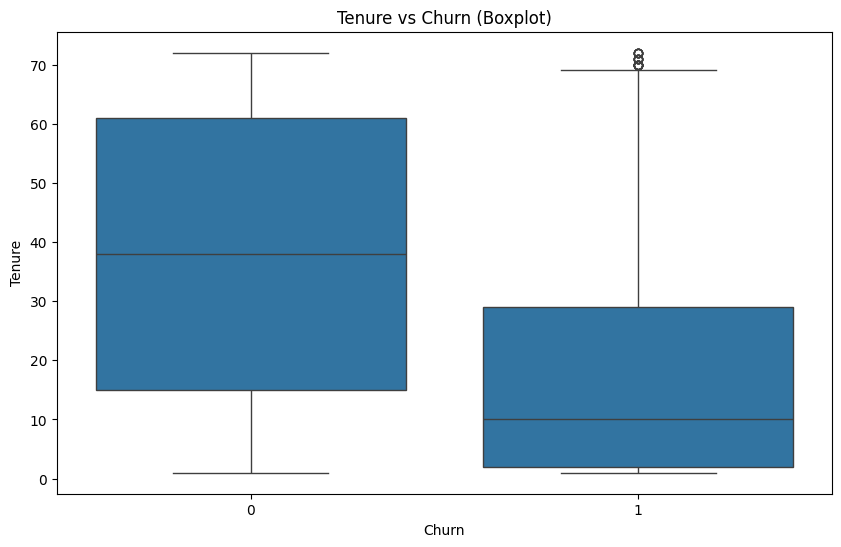

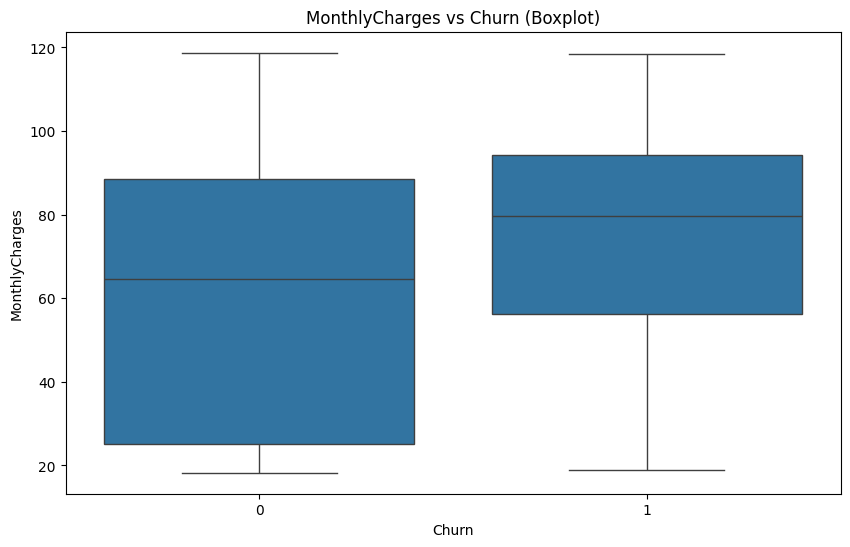

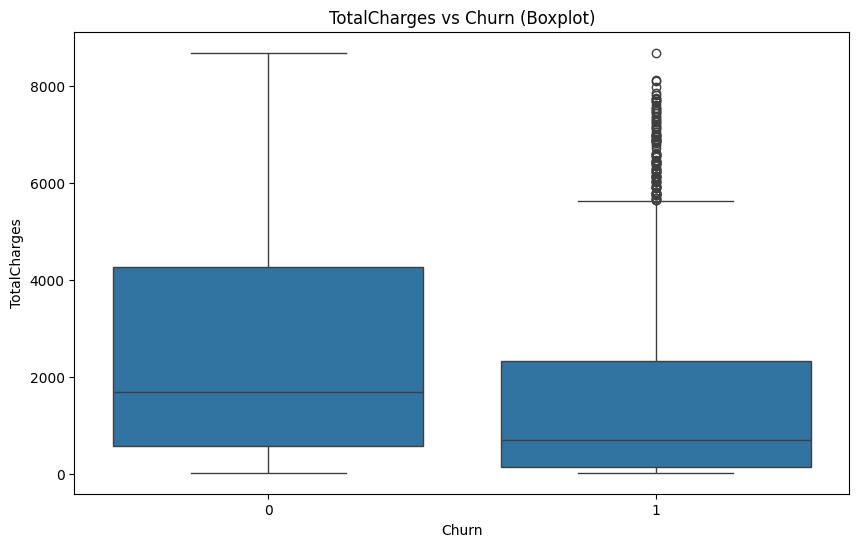

In [ ]:
numeric = feature.select_dtypes(include=['int64', 'float64']).columns

numeric_plot = pd.concat([feature, target], axis=1)

for i in numeric:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=numeric_plot, x='Churn', y=i)
    plt.title(f"{i} vs Churn (Boxplot)")
    plt.show()

Insight :

Berdasarkan visualiasi diatas, pelanggan churn umumnya memiliki tenure yang singkat, biaya bulanan yang lebih tinggi dan total charges yang rendah (bisa jadi karena pelanggan tersebut hanya singkat menggunakan layanan). Hal ini mengindikasikan bahwa resiko churn lebih besar pada pelanggan baru dengan tagihan bulanan yang lebih tinggi, selain itu lama berlangganan menjadi salah satu faktor penting dalam meningkatkan loyalitas.

## Korelasi antara Variabel Numerik

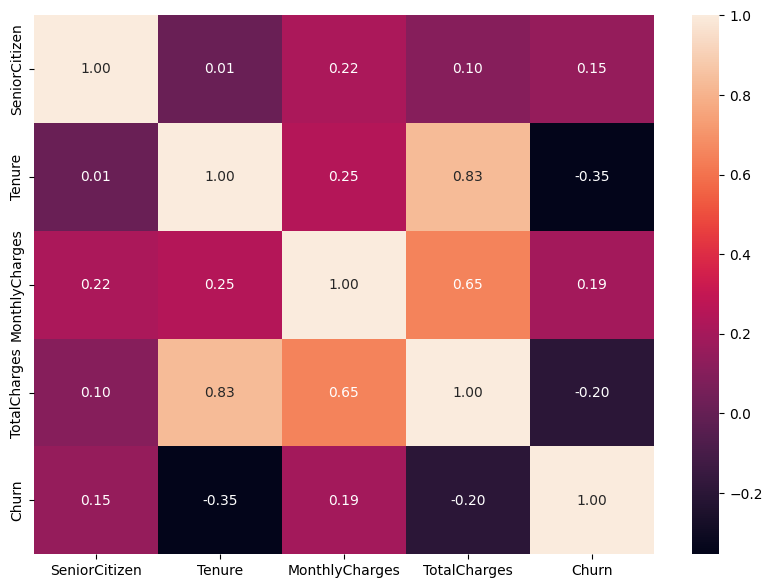

In [ ]:
numeric = df_churn.select_dtypes(include=['int64', 'float64'])

corr = numeric.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Insight :

Berdasarkan heatmap korelasi, terlihat bahwa tenure memiliki korelasi negatif dengan churn (-0.35), artinya semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn. Sementara itu, total charges berkorelasi kuat dengan tenure (0.83) dan juga cukup tinggi dengan monthly charges (0.65), hal ini karena total charges merupakan akumulasi dari lama berlangganan dan biaya bulanan. Variabel senior citizen memiliki korelasi rendah terhadap churn (0.15), sehingga faktor usia lanjut tidak terlalu berpengaruh signifikan.

## Korelasi antara Variabel Kategori Terhadap Churn

In [ ]:
from scipy.stats import chisquare, chi2_contingency

kategori = feature.select_dtypes(include=['object']).columns

corr_kategori_plot = pd.concat([feature, target], axis=1)

for i in kategori:
    contingency_table = pd.crosstab(corr_kategori_plot[i], corr_kategori_plot['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # mencari kekuatan sampel
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt((chi2 / n) / min_dim)
    #menampilkan hasil
    print(f"============= {i} =================")
    print(f"Stats Chi-Square {i}: {chi2}")

    if p < 0.05:
        print(f"P-value for {i}: {p:.4f} -> Ada hubungan signifikan")
    else:
        print(f"P-value for {i}: {p:.4f} -> Tidak ada hubungan secara signifikan")

    if cramers_v < 0.1:
        print(f"value cramers : {cramers_v:.4f} -> Effect sangat lemah terhadap churn \n")
    elif cramers_v < 0.3:
        print(f"value cramers : {cramers_v:.4f} -> Effect lemah terhadap churn \n")
    elif cramers_v  < 0.5:
        print(f"value cramers : {cramers_v:.4f} -> Effect medium terhadap churn \n")
    else:
        print(f"value cramers : {cramers_v:.4f} -> Effect kuat terhadap churn \n")


============= Gender =================
Stats Chi-Square Gender: 0.42450474136856153
P-value for Gender: 0.5147 -> Tidak ada hubungan secara signifikan
value cramers : 0.0078 -> Effect sangat lemah terhadap churn 

============= Partner =================
Stats Chi-Square Partner: 155.1177585479172
P-value for Partner: 0.0000 -> Ada hubungan signifikan
value cramers : 0.1486 -> Effect lemah terhadap churn 

============= Dependents =================
Stats Chi-Square Dependents: 186.37580932603856
P-value for Dependents: 0.0000 -> Ada hubungan signifikan
value cramers : 0.1629 -> Effect lemah terhadap churn 

============= Contract =================
Stats Chi-Square Contract: 1176.0100972795094
P-value for Contract: 0.0000 -> Ada hubungan signifikan
value cramers : 0.4092 -> Effect medium terhadap churn 

============= PaperlessBilling =================
Stats Chi-Square PaperlessBilling: 257.16147785124485
P-value for PaperlessBilling: 0.0000 -> Ada hubungan signifikan
value cramers : 0.1

Insight :

Berdasarkan hasil uji Chi-Square, variabel Gender tidak memiliki hubungan signifikan dengan churn (p-value 0.5147, effect sangat lemah). Sementara itu, variabel Partner, Dependents, dan PaperlessBilling menunjukkan hubungan signifikan, namun dengan effect yang lemah terhadap churn. Variabel Contract dan PaymentMethod memiliki hubungan signifikan dengan effect yang lebih kuat, di mana Contract menunjukkan effect sedang (0.4092) dan PaymentMethod juga effect sedang (0.3024). Dengan demikian, faktor jenis kontrak dan metode pembayaran merupakan variabel kategori yang paling berpengaruh terhadap churn, sedangkan gender tidak berpengaruh.

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Copy dataset

In [ ]:
df_churn_regresi = df_churn.copy()

In [ ]:
df_churn_klasifikasi = df_churn.copy()

## Preprocessing untuk regresi

In [ ]:
df_churn_regresi.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,No,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
feature = df_churn_regresi.drop(['MonthlyCharges', 'customerID'], axis=1)
target = df_churn_regresi['MonthlyCharges']

feature_churnreg_train, feature_churnreg_test, target_churnreg_train, target_churnreg_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#### Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

##### Training

In [ ]:
encoder_reg = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
ohe = ['Gender', 'Partner','Dependents','PaperlessBilling','PaymentMethod', 'Contract']

one_hot_encoded = encoder_reg.fit_transform(feature_churnreg_train[ohe])

In [ ]:
ohe_df = pd.DataFrame(one_hot_encoded,
                      columns=encoder_reg.get_feature_names_out(ohe),
                      index=feature_churnreg_train.index)

feature_churnreg_train = pd.concat([feature_churnreg_train.drop(columns=ohe), ohe_df], axis=1)

##### Testing

In [ ]:
ohe_test = encoder_reg.transform(feature_churnreg_test[ohe])

In [ ]:
ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=encoder_reg.get_feature_names_out(ohe),
    index=feature_churnreg_test.index
)

feature_churnreg_test = pd.concat([feature_churnreg_test.drop(columns=ohe), ohe_test_df], axis=1)

In [ ]:
feature_churnreg_train.head()

,SeniorCitizen,Tenure,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3275,0.0,55.0,3068.60,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5277,0.0,8.0,609.90,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1324,0.0,23.0,1221.55,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7028,0.0,72.0,7362.90,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4078,0.0,30.0,1187.05,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
feature_churnreg_test.head()

,SeniorCitizen,Tenure,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3916,0.0,1.0,80.85,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2466,0.0,53.0,5149.50,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2885,1.0,47.0,3309.25,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,0.0,33.0,1857.30,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6904,0.0,72.0,6841.30,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


#### Multicoleniarity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant


X = feature_churnreg_train.astype(float)
X = add_constant(X)


vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,SeniorCitizen,1.142755
2,Tenure,5.489486
3,TotalCharges,3.760976
4,Churn,1.318930
5,Gender_Male,1.001485
6,Partner_Yes,1.464676
7,Dependents_Yes,1.382972
8,PaperlessBilling_Yes,1.182723
9,PaymentMethod_Credit card (automatic),1.555677
10,PaymentMethod_Electronic check,1.939277


Drop total charges dan tenure, karena memiliki vif score yang tinggi sehingga diindikasikan bahwa kedua variabel tersebut memiliki keterkaitan satu sama lain.

In [ ]:
feature_churnreg_train = feature_churnreg_train.drop(columns=['TotalCharges', 'Tenure'])
feature_churnreg_test = feature_churnreg_test.drop(columns=['TotalCharges', 'Tenure'])

In [ ]:
feature_churnreg_train.head()

,SeniorCitizen,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3275,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5277,0.0,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1324,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7028,0.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4078,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
feature_churnreg_test.head()

,SeniorCitizen,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3916,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2466,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2885,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,0.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6904,0.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Preprocessing untuk Klasifikasi

In [ ]:
df_churn_klasifikasi.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,No,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
feature = df_churn_klasifikasi.drop(['Churn', 'customerID'], axis=1)
target = df_churn_klasifikasi['Churn']

feature_churncf_train, feature_churncf_test, target_churncf_train, target_churncf_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#### Encoding

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

##### Training

In [ ]:
ohe = ['Gender', 'Partner','Dependents','PaperlessBilling','PaymentMethod', 'Contract']

one_hot_encoded = encoder.fit_transform(feature_churncf_train[ohe])

In [ ]:
ohe_df = pd.DataFrame(one_hot_encoded,
                      columns=encoder.get_feature_names_out(ohe),
                      index=feature_churncf_train.index)

feature_churncf_train = pd.concat([feature_churncf_train.drop(ohe, axis=1), ohe_df], axis=1)

##### Testing

In [ ]:
ohe_test = encoder.transform(feature_churncf_test[ohe])

In [ ]:
ohe_df = pd.DataFrame(ohe_test,
                      columns=encoder.get_feature_names_out(ohe),
                      index=feature_churncf_test.index)

feature_churncf_test = pd.concat([feature_churncf_test.drop(ohe, axis=1), ohe_df], axis=1)

In [ ]:
feature_churncf_train.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
3275,0.0,55.0,58.60,3068.60,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5277,0.0,8.0,74.50,609.90,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1324,0.0,23.0,54.25,1221.55,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7028,0.0,72.0,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4078,0.0,30.0,40.35,1187.05,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
feature_churncf_test.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
3916,0.0,1.0,80.85,80.85,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2466,0.0,53.0,98.40,5149.50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2885,1.0,47.0,70.55,3309.25,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5229,0.0,33.0,53.75,1857.30,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6904,0.0,72.0,97.85,6841.30,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Only Logsitic Regression

In [ ]:
df_logistic_reg = df_churn_klasifikasi.copy()

In [ ]:
feature = df_logistic_reg.drop(['Churn', 'customerID'], axis=1)
target = df_logistic_reg['Churn']

feature_logreg_train, feature_logreg_test, target_logreg_train, target_logreg_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
encoder_reg = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

##### Encoding

###### Training

In [ ]:
ohe = ['Gender', 'Partner','Dependents','PaperlessBilling','PaymentMethod', 'Contract']

one_hot_encoded = encoder_reg.fit_transform(feature_logreg_train[ohe])

In [ ]:
ohe_df = pd.DataFrame(one_hot_encoded,
                      columns=encoder_reg.get_feature_names_out(ohe),
                      index=feature_logreg_train.index)

feature_logreg_train = pd.concat([feature_logreg_train.drop(ohe, axis=1), ohe_df], axis=1)

###### Testing

In [ ]:
ohe_test = encoder_reg.transform(feature_logreg_test[ohe])

In [ ]:
ohe_df = pd.DataFrame(ohe_test,
                      columns=encoder_reg.get_feature_names_out(ohe),
                      index=feature_logreg_test.index)

feature_logreg_test = pd.concat([feature_logreg_test.drop(ohe, axis=1), ohe_df], axis=1)

##### Multikoleniarity

In [ ]:
X = add_constant(feature_logreg_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,SeniorCitizen,1.141181
2,Tenure,7.468032
3,MonthlyCharges,3.901936
4,TotalCharges,9.828665
5,Gender_Male,1.001622
6,Partner_Yes,1.465283
7,Dependents_Yes,1.382139
8,PaperlessBilling_Yes,1.201188
9,PaymentMethod_Credit card (automatic),1.555685
10,PaymentMethod_Electronic check,1.944428


Drop kolom total charges, tenure

In [ ]:
feature_logreg_train = feature_logreg_train.drop(columns=['TotalCharges', 'Tenure'])
feature_logreg_test = feature_logreg_test.drop(columns=['TotalCharges', 'Tenure'])

In [ ]:
#re-check VIF
X = add_constant(feature_logreg_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df= vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,SeniorCitizen,1.136771
2,MonthlyCharges,1.354567
3,Gender_Male,1.000896
4,Partner_Yes,1.396760
5,Dependents_Yes,1.379777
6,PaperlessBilling_Yes,1.199834
7,PaymentMethod_Credit card (automatic),1.555256
8,PaymentMethod_Electronic check,1.898534
9,PaymentMethod_Mailed check,1.747047
10,Contract_One year,1.195918


##### Scaling

###### Training

In [ ]:
scaler = StandardScaler()
feature_logreg_train[['MonthlyCharges']] = scaler.fit_transform(feature_logreg_train[['MonthlyCharges']])

###### Testing

In [ ]:
feature_logreg_test[['MonthlyCharges']] = scaler.transform(feature_logreg_test[['MonthlyCharges']])

In [ ]:
feature_logreg_train.head()

,SeniorCitizen,MonthlyCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3275,0.0,-0.214852,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5277,0.0,0.316506,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1324,0.0,-0.360224,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7028,0.0,1.275624,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4078,0.0,-0.824744,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
feature_logreg_test.head()

,SeniorCitizen,MonthlyCharges,Gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
3916,0.0,0.528715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2466,0.0,1.115214,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2885,1.0,0.184502,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,0.0,-0.376933,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6904,0.0,1.096834,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Modelling

## Regresi Linear

In [ ]:
X_charges_train = feature_churnreg_train.to_numpy()
y_charges_train = target_churnreg_train.to_numpy().ravel()

X_charges_test = feature_churnreg_test.to_numpy()
y_charges_test = target_churnreg_test.to_numpy().ravel()


### Based Model

In [ ]:
from sklearn.linear_model import LinearRegression

#Definisikan Model
multi_reg = LinearRegression()

In [ ]:
#Training Model
multi_reg.fit(X_charges_train, y_charges_train)

LinearRegression()

In [ ]:
data = feature_churnreg_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
}).round(4)

coef_df

,feature,coefficient
0,intercept,51.8589
1,SeniorCitizen,7.5311
2,Churn,7.1475
3,Gender_Male,-0.3207
4,Partner_Yes,7.5686
5,Dependents_Yes,-5.4214
6,PaperlessBilling_Yes,15.7878
7,PaymentMethod_Credit card (automatic),-1.3194
8,PaymentMethod_Electronic check,4.9325
9,PaymentMethod_Mailed check,-18.1755


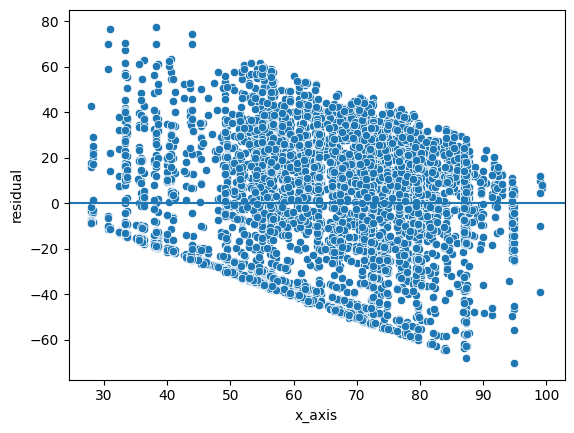

In [ ]:
#Diagnostic Study
# Hitung Residual
y_predict_train = multi_reg.predict(X_charges_train)
residual = y_charges_train - y_predict_train


df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


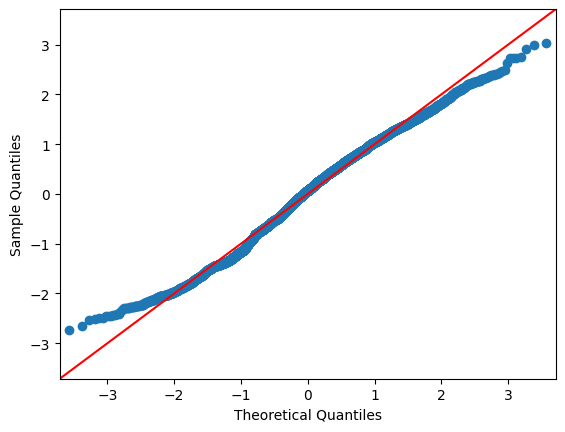

In [ ]:
# QQplot
std_resid = StandardScaler().fit_transform(residual.reshape(-1,1)).ravel()

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [ ]:
#Training Error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('R-squared (train):', r2_score(y_charges_train, y_predict_train))
print('RMSE (train):', np.sqrt(mean_squared_error(y_charges_train, y_predict_train)))
print('MAE (train):', mean_absolute_error(y_charges_train, y_predict_train))
print("MAPE (train):", mean_absolute_percentage_error(y_charges_train, y_predict_train))


R-squared (train): 0.27053129951604094
RMSE (train): 25.557194260554116
MAE (train): 21.129077869469917
MAPE (train): 0.521287973279167


In [ ]:
#predict model
y_predict_test = multi_reg.predict(X_charges_test)

In [ ]:
print('R-squared (test):', r2_score(y_charges_test, y_predict_test))
print('RMSE (test):', np.sqrt(mean_squared_error(y_charges_test, y_predict_test)))
print('MAE (test):', mean_absolute_error(y_charges_test, y_predict_test))
print("MAPE (test):", mean_absolute_percentage_error(y_charges_test, y_predict_test))

R-squared (test): 0.24407825420749474
RMSE (test): 26.56407538210124
MAE (test): 22.144893962256386
MAPE (test): 0.5731654844239584


### Ridge

In [ ]:
# Definisikan model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)


In [ ]:
# Gunakan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Hyperparameter yang digunakan
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001,
              0.01, 0.1, 1, 5, 10, 20)
}

# Tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5,
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_charges_train, y_charges_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-25.636181,10
1,{'alpha': 1e-05},-25.636181,9
2,{'alpha': 0.0001},-25.636181,8
3,{'alpha': 0.001},-25.636181,7
4,{'alpha': 0.01},-25.636179,6
5,{'alpha': 0.1},-25.636165,5
6,{'alpha': 1},-25.636023,4
7,{'alpha': 5},-25.635479,3
8,{'alpha': 10},-25.634986,2
9,{'alpha': 20},-25.634582,1


In [ ]:
# Model terbaik
ridge_reg_gridcv.best_estimator_

Ridge(alpha=20, random_state=42)

In [ ]:
# show as a nice dataframe
data = feature_churnreg_train
best_ridge = ridge_reg_gridcv.best_estimator_
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[best_ridge.intercept_] + list(best_ridge.coef_)
}).round(4)

coef_df

,feature,coefficient
0,intercept,51.8938
1,SeniorCitizen,7.4411
2,Churn,7.0072
3,Gender_Male,-0.3254
4,Partner_Yes,7.4777
5,Dependents_Yes,-5.3118
6,PaperlessBilling_Yes,15.6149
7,PaymentMethod_Credit card (automatic),-1.0811
8,PaymentMethod_Electronic check,5.1134
9,PaymentMethod_Mailed check,-17.7548


In [ ]:
y_pred_train_ridge = best_ridge.predict(X_charges_train)
print("Train Ridge R²:", r2_score(y_charges_train, y_pred_train_ridge))
print("Train Ridge RMSE:", np.sqrt(mean_squared_error(y_charges_train, y_pred_train_ridge)))
print("Train Ridge MAE:", mean_absolute_error(y_charges_train, y_pred_train_ridge))
print("Train MAPE:", mean_absolute_percentage_error(y_charges_train, y_pred_train_ridge))

Train Ridge R²: 0.2704773247654042
Train Ridge RMSE: 25.558139755316482
Train Ridge MAE: 21.15388722779473
Train MAPE: 0.5225157879757178


In [ ]:
y_pred_ridge = best_ridge.predict(X_charges_test)
print("Ridge R²:", r2_score(y_charges_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_charges_test, y_pred_ridge)))
print("Ridge MAE:", mean_absolute_error(y_charges_test, y_pred_ridge))
print("MAPE:", mean_absolute_percentage_error(y_charges_test, y_pred_ridge))

Ridge R²: 0.24439249997095924
Ridge RMSE: 26.55855330529206
Ridge MAE: 22.167627517731685
MAPE: 0.5742438572564526


### Lasso

In [ ]:
from sklearn.linear_model import Lasso

#Definisikan Lasso
lasso_reg = Lasso(max_iter=10000, random_state=42)

In [ ]:
# hyperparameter
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001,
              0.01, 0.1, 1, 5, 10, 20)
}

# tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5,
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_charges_train, y_charges_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-25.636181,5
1,{'alpha': 1e-05},-25.636181,4
2,{'alpha': 0.0001},-25.636177,3
3,{'alpha': 0.001},-25.636142,2
4,{'alpha': 0.01},-25.635908,1
5,{'alpha': 0.1},-25.642453,6
6,{'alpha': 1},-26.101375,7
7,{'alpha': 5},-29.690181,8
8,{'alpha': 10},-29.921276,9
9,{'alpha': 20},-29.921276,9


In [ ]:
# the best model
lasso_reg_gridcv.best_estimator_

Lasso(alpha=0.01, max_iter=10000, random_state=42)

In [ ]:
best_lasso = lasso_reg_gridcv.best_estimator_
data = feature_churnreg_train

In [ ]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[best_lasso.intercept_] + list(best_lasso.coef_)
}).round(4)

coef_df

,feature,coefficient
0,intercept,51.9179
1,SeniorCitizen,7.4841
2,Churn,7.0687
3,Gender_Male,-0.2830
4,Partner_Yes,7.5271
5,Dependents_Yes,-5.3507
6,PaperlessBilling_Yes,15.7597
7,PaymentMethod_Credit card (automatic),-1.2265
8,PaymentMethod_Electronic check,4.9266
9,PaymentMethod_Mailed check,-18.1267


In [ ]:
y_pred_train_lasso = best_lasso.predict(X_charges_train)
print("Train Lasso R²:", r2_score(y_charges_train, y_pred_train_lasso))
print("Train Lasso RMSE:", np.sqrt(mean_squared_error(y_charges_train, y_pred_train_lasso)))
print("Train Lasso MAE:", mean_absolute_error(y_charges_train, y_pred_train_lasso))
print("Train MAPE:", mean_absolute_percentage_error(y_charges_train, y_pred_train_lasso))

Train Lasso R²: 0.27052313438345177
Train Lasso RMSE: 25.55733729430982
Train Lasso MAE: 21.134724992201612
Train MAPE: 0.5215399891983812


In [ ]:
y_pred_lasso = best_lasso.predict(X_charges_test)
print("Test Lasso R²:", r2_score(y_charges_test, y_pred_lasso))
print("Test Lasso RMSE:", np.sqrt(mean_squared_error(y_charges_test, y_pred_lasso)))
print("Test Lasso MAE:", mean_absolute_error(y_charges_test, y_pred_lasso))
print("Test MAPE:", mean_absolute_percentage_error(y_charges_test, y_pred_lasso))



Test Lasso R²: 0.24419914192242553
Test Lasso RMSE: 26.561951221242214
Test Lasso MAE: 22.14880327329652
Test MAPE: 0.57336602737061


---

Kesimpulan :

Saya melakukan eksperimen untuk memprediksi *Monthly Charges* karena target *Churn* bersifat kategorikal, bukan kontinu. Namun, hasil dari base model, Ridge, maupun Lasso menunjukkan bahwa performa regresi terhadap data tersebut masih rendah (R² hanya sekitar 24–27%), jauh dari harapan. Hal ini mengindikasikan bahwa dataset kurang cocok digunakan untuk pemodelan regresi linear sederhana, baik dengan regularisasi maupun tanpa regularisasi. Kemungkinan penyebabnya adalah keterbatasan fitur dalam menjelaskan variasi Monthly Charges, sehingga model tidak mampu mencapai performa yang optimal meskipun dilakukan hyperparameter tuning.

## Klasifikasi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,make_scorer
from imblearn.combine import SMOTEENN


## Based Model

In [ ]:
knn_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())
])

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'KNN': knn_pipeline
}

results = []

for name, clf in classifiers.items():
    clf.fit(feature_churncf_train, target_churncf_train)

    #predict di train
    y_pred_train = clf.predict(feature_churncf_train)
    y_pred_train_probs = clf.predict_proba(feature_churncf_train)[:, 1]

    #predict di test
    y_pred_test = clf.predict(feature_churncf_test)
    y_pred_test_probs = clf.predict_proba(feature_churncf_test)[:, 1]

    #evaluate di train
    precision_train = precision_score(target_churncf_train, y_pred_train, pos_label=1)
    recall_train = recall_score(target_churncf_train, y_pred_train, pos_label=1)
    f1_train = f1_score(target_churncf_train, y_pred_train, pos_label=1)
    roc_auc_train = roc_auc_score(target_churncf_train, y_pred_train_probs)

    #evaluate di test
    precision_test = precision_score(target_churncf_test , y_pred_test, pos_label=1)
    recall_test = recall_score(target_churncf_test , y_pred_test, pos_label=1)
    f1_test = f1_score(target_churncf_test , y_pred_test, pos_label=1)
    roc_auc_test = roc_auc_score(target_churncf_test , y_pred_test_probs)

    #hasil
    results.append({
        'Model': name,
        'Precision (train)': precision_train,
        'Recall (train)': recall_train,
        'F1-Score (train)': f1_train,
        'ROC AUC (train)': roc_auc_train,
        'Precision (test)': precision_test,
        'Recall (test)': recall_test,
        'F1-Score (test)': f1_test,
        'ROC AUC (test)': roc_auc_test
    })

#create dataframe
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1502, number of negative: 4116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 5618, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267355 -> initscore=-1.008084
[LightGBM] [Info] Start training from score -1.008084


,Model,Precision (train),Recall (train),F1-Score (train),ROC AUC (train),Precision (test),Recall (test),F1-Score (test),ROC AUC (test)
0,Logistic Regression,0.648760,0.522636,0.578909,0.839759,0.583916,0.458791,0.513846,0.823635
1,Decision Tree,1.000000,0.992011,0.995989,0.999988,0.460759,0.500000,0.479578,0.649405
2,Random Forest,0.997330,0.994674,0.996000,0.999973,0.560976,0.442308,0.494624,0.803801
3,XGBoost,0.887377,0.781625,0.831150,0.974628,0.586538,0.502747,0.541420,0.821605
4,LightGBM,0.807630,0.662450,0.727871,0.942349,0.598684,0.500000,0.544910,0.826449
5,KNN,0.723590,0.606525,0.659906,0.900474,0.526144,0.442308,0.480597,0.744090


antara XG-Boost atau LightGBM

## XG-Boost

#### Base Model

In [ ]:
#definisikan model
xgb = XGBClassifier(random_state=42)

#fit model
xgb.fit(feature_churncf_train, target_churncf_train)

#predict di train dan test
xg_pred_train = xgb.predict(feature_churncf_train)
xg_pred_train_probs = xgb.predict_proba(feature_churncf_train)[:, 1]

xg_pred_test = xgb.predict(feature_churncf_test)
xg_pred_test_probs = xgb.predict_proba(feature_churncf_test)[:, 1]

#evaluate
xg_train_metrics = {
    'Precision': precision_score(target_churncf_train, xg_pred_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, xg_pred_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, xg_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, xg_pred_train_probs)
}

xg_test_metrics = {
    'Precision': precision_score(target_churncf_test, xg_pred_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, xg_pred_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, xg_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, xg_pred_test_probs)
}

xg_evaluation_df = pd.DataFrame([xg_train_metrics, xg_test_metrics], index=['Train', 'Test'])
xg_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.887377,0.781625,0.83115,0.974628
Test,0.586538,0.502747,0.54142,0.821605


#### Hyperparameter Tuning Without Handling Imbalanced Data

In [ ]:
#definisikan model
tuned_xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# parameters
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

#set up cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#random search
random_search = RandomizedSearchCV(tuned_xgb, param_grid, n_iter=10, cv=5, scoring='recall', random_state=42)

# Fit model
random_search.fit(feature_churncf_train, target_churncf_train)

#the best parameter
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1}
Best score:  0.517968992248062


In [ ]:
#retrieve model
tuned_model = random_search.best_estimator_

#predict di train and test
tuned_pred_train = tuned_model.predict(feature_churncf_train)
tuned_pred_train_probs = tuned_model.predict_proba(feature_churncf_train)[:, 1]

tuned_pred_test = tuned_model.predict(feature_churncf_test)
tuned_pred_test_probs = tuned_model.predict_proba(feature_churncf_test)[:, 1]

#evaluate
tuned_train_metrics = {
    'Precision': precision_score(target_churncf_train, tuned_pred_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, tuned_pred_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, tuned_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, tuned_pred_train_probs)
}

tuned_test_metrics = {
    'Precision': precision_score(target_churncf_test, tuned_pred_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, tuned_pred_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, tuned_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, tuned_pred_test_probs)
}

tuned_evaluation_df = pd.DataFrame([tuned_train_metrics, tuned_test_metrics], index=['Train', 'Test'])
tuned_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.718724,0.569907,0.635722,0.883236
Test,0.601375,0.480769,0.534351,0.831445


#### Hyperparameter Tuning With SMOTEENN

In [ ]:
pipe = Pipeline([
    ('sampling', None),
    ('model', XGBClassifier(random_state=42))
])

param_grid = {
    'sampling': [None, SMOTEENN(random_state=42)],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0, 0.1, 1]
    }


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#random search
random_search = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, cv=5, scoring='recall', random_state=42)

# Fit the model
random_search.fit(feature_churncf_train, target_churncf_train)

#the best parameter
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'sampling': SMOTEENN(random_state=42), 'model__subsample': 0.8, 'model__reg_lambda': 0, 'model__reg_alpha': 0, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__gamma': 0.2}
Best score:  0.8242303433001108


In [ ]:
#retrieve model
tuned_model_xgb_smoten = random_search.best_estimator_

#predict on train and test
tuned_pred_smoten_train = tuned_model_xgb_smoten.predict(feature_churncf_train)
tuned_pred_smoten_train_probs = tuned_model_xgb_smoten.predict_proba(feature_churncf_train)[:, 1]

tuned_pred_smoten_test = tuned_model_xgb_smoten.predict(feature_churncf_test)
tuned_pred_smoten_test_probs = tuned_model_xgb_smoten.predict_proba(feature_churncf_test)[:, 1]

#evaluate
tuned_train_smoten_metrics = {
    'Precision': precision_score(target_churncf_train, tuned_pred_smoten_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, tuned_pred_smoten_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, tuned_pred_smoten_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, tuned_pred_smoten_train_probs)
}

tuned_test_smoten_metrics = {
    'Precision': precision_score(target_churncf_test, tuned_pred_smoten_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, tuned_pred_smoten_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, tuned_pred_smoten_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, tuned_pred_smoten_test_probs)
}

tuned_evaluation_df = pd.DataFrame([tuned_train_smoten_metrics, tuned_test_smoten_metrics], index=['Train', 'Test'])
tuned_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.491282,0.844208,0.621112,0.83651
Test,0.470126,0.821429,0.598000,0.82376


## LightGBM

### Base Model

In [ ]:
# Inisialisasi model LightGBM
lgbm = LGBMClassifier(random_state=42)

# Fit model ke data training
lgbm.fit(feature_churncf_train, target_churncf_train)

# Prediksi untuk data training
lgbm_pred_train = lgbm.predict(feature_churncf_train)
lgbm_pred_train_probs = lgbm.predict_proba(feature_churncf_train)[:, 1]

# Prediksi untuk data testing
lgbm_pred_test = lgbm.predict(feature_churncf_test)
lgbm_pred_test_probs = lgbm.predict_proba(feature_churncf_test)[:, 1]

# Evaluasi metrik untuk data training
lgbm_train_metrics = {
    'Precision': precision_score(target_churncf_train, lgbm_pred_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, lgbm_pred_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, lgbm_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, lgbm_pred_train_probs)
}

# Evaluasi metrik untuk data testing
lgbm_test_metrics = {
    'Precision': precision_score(target_churncf_test, lgbm_pred_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, lgbm_pred_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, lgbm_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, lgbm_pred_test_probs)
}

# Gabungkan ke dalam satu DataFrame
lgbm_evaluation_df = pd.DataFrame([lgbm_train_metrics, lgbm_test_metrics], index=['Train', 'Test'])

# Tampilkan hasil
lgbm_evaluation_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1502, number of negative: 4116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 5618, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267355 -> initscore=-1.008084
[LightGBM] [Info] Start training from score -1.008084


,Precision,Recall,F1-Score,ROC AUC
Train,0.807630,0.66245,0.727871,0.942349
Test,0.598684,0.50000,0.544910,0.826449


### Hyperparameter Tuning WIthout Handling Imbalanced Data

In [ ]:
# Definisikan model dasar
tuned_lgbm = LGBMClassifier(random_state=42)

# Definisikan parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 495],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'num_leaves': [15, 31, 63]
}

# Skema validasi silang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gunakan F1 sebagai metrik evaluasi
f1_scorer = make_scorer(f1_score)

# Randomized Search
random_search_lgbm = RandomizedSearchCV(
    estimator=tuned_lgbm,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring=f1_scorer,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model ke data training
random_search_lgbm.fit(feature_churncf_train, target_churncf_train)

# Cetak hasil terbaik
print("Best set of hyperparameters: ", random_search_lgbm.best_params_)
print("Best F1 score: ", random_search_lgbm.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1502, number of negative: 4116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 5618, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267355 -> initscore=-1.008084
[LightGBM] [Info] Start training from score -1.008084
Best set of hyperparameters:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 15, 'n_estimators': 495, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best F1 score:  0.5792962184323086


In [ ]:
# Ambil model terbaik dari hasil hypertuning
tuned_lgbm = random_search_lgbm.best_estimator_

# Prediksi pada data train
tuned_lgbm_pred_train = tuned_lgbm.predict(feature_churncf_train)
tuned_lgbm_pred_train_probs = tuned_lgbm.predict_proba(feature_churncf_train)[:, 1]

# Prediksi pada data test
tuned_lgbm_pred_test = tuned_lgbm.predict(feature_churncf_test)
tuned_lgbm_pred_test_probs = tuned_lgbm.predict_proba(feature_churncf_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_metrics = {
    'Precision': precision_score(target_churncf_train, tuned_lgbm_pred_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, tuned_lgbm_pred_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, tuned_lgbm_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, tuned_lgbm_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_metrics = {
    'Precision': precision_score(target_churncf_test, tuned_lgbm_pred_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, tuned_lgbm_pred_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, tuned_lgbm_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, tuned_lgbm_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_lgbm_evaluation_df = pd.DataFrame([tuned_train_metrics, tuned_test_metrics], index=['Train', 'Test'])

# Tampilkan hasil evaluasi
tuned_lgbm_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.710833,0.567909,0.631384,0.874526
Test,0.611296,0.505495,0.553383,0.835289


### Hyperparameter Tuning with SMOTEENN

In [ ]:
pipe = Pipeline([
    ('sampling', None),
    ('model', LGBMClassifier(random_state=42))
])

param_grid = {
    'sampling': [None, SMOTEENN(random_state=42)],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300, 495],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0, 0.1, 1],
    'model__num_leaves': [15, 31, 63]

    }


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)

#random search
random_search = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, cv=5, scoring=f1_scorer, random_state=42)

# Fit the model
random_search.fit(feature_churncf_train, target_churncf_train)

#the best parameter
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
#retrieve model
tuned_model_lgbm_smoten = random_search.best_estimator_

#predict on train and test
pred_lgbm_smoten_train = tuned_model_lgbm_smoten.predict(feature_churncf_train)
pred_lgbm_smoten_train_probs = tuned_model_lgbm_smoten.predict_proba(feature_churncf_train)[:, 1]

pred_lgbm_smoten_test = tuned_model_lgbm_smoten.predict(feature_churncf_test)
pred_lgbm_smoten_test_probs = tuned_model_lgbm_smoten.predict_proba(feature_churncf_test)[:, 1]

#evaluate
lgbm_smoten_train_metrics = {
    'Precision': precision_score(target_churncf_train, pred_lgbm_smoten_train, pos_label=1),
    'Recall': recall_score(target_churncf_train, pred_lgbm_smoten_train, pos_label=1),
    'F1-Score': f1_score(target_churncf_train, pred_lgbm_smoten_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_train, pred_lgbm_smoten_train_probs)
}

lgbm_smoten_test_metrics = {
    'Precision': precision_score(target_churncf_test, pred_lgbm_smoten_test, pos_label=1),
    'Recall': recall_score(target_churncf_test, pred_lgbm_smoten_test, pos_label=1),
    'F1-Score': f1_score(target_churncf_test, pred_lgbm_smoten_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_churncf_test, pred_lgbm_smoten_test_probs)
}

tuned_evaluation_df = pd.DataFrame([lgbm_smoten_test_metrics, lgbm_smoten_train_metrics], index=['Train', 'Test'])
tuned_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.498162,0.744505,0.596916,0.82101
Test,0.535827,0.791611,0.639076,0.84412


# Evaluasi Model

Diantara kedua model ini yaitu XG-Boost dan LightGBM. Semua bagus untuk pemodelan churn, namun dengan strategi bisnis berbeda. Jika strateginya untuk deteksi dini agar pelanggan churn tidak terlewat, maka model XG-Boost cocok karena recall nya lebih tinggi yaitu (0.82) dibandingkan Light-GBM (0.79). Sebaliknya, jika strateginya mengarah keseimbangan antara precision dan recall untuk mengurangi prediksi churn yang berlebihan maka model LightGBM cocok karena precision nya (0.53) sedangkan XG-Boost (0.47)

## XG-Boost

In [ ]:
evaluation_df = pd.DataFrame([xg_train_metrics, xg_test_metrics,
                              tuned_train_metrics, tuned_test_metrics,
                              tuned_train_smoten_metrics, tuned_test_smoten_metrics],
                             index = ['Base XG-Boost (Train)', 'Base XG-Boost (Test)',
                                      'Hyperparameter Tuning XG-Boost (Train)', 'Hyperparameter Tuning XG-Boost (Test)',
                                      'Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Train)', 'Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Test)'])
evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Base XG-Boost (Train),0.887377,0.781625,0.831150,0.974628
Base XG-Boost (Test),0.586538,0.502747,0.541420,0.821605
Hyperparameter Tuning XG-Boost (Train),0.710833,0.567909,0.631384,0.874526
Hyperparameter Tuning XG-Boost (Test),0.611296,0.505495,0.553383,0.835289
Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Train),0.491282,0.844208,0.621112,0.836510
Hyperparameter Tuning XG-Boost menggunakan SMOTEENN (Test),0.470126,0.821429,0.598000,0.823760


Berdasarkan hasil eksperimen dengan XGBoost:
1. Model based awal menunjukkan performa cukup baik dengan F1-score test sebesar (0.54), precision (0.58) dan AUC (0.82), namun recall masih rendah (0.50) sehingga model kurang optimal dalam menangkap pelanggan yang benar-benar churn.
2. Setelah dilakukan hyperparameter tuning tanpa SMOTEENN, performa test sedikit membaik pada F1-score (0.53), dan AUC (0.83), meskipun recall masih rendah (0.48) dan precision (0.49), menandakan bahwa model ini harus dioptimalisasi.
3. Penggunaan SMOTEENN dengan hyperparameter tuning memberikan performa lebih seimbang, dengan peningkatan signifikan recall (0.82) dan F1-score (0.59), meskipun precision sedikit menurun (0.47).

Artinya, model lebih sensitif dalam mendeteksi churn sehingga sebagian pelanggan loyal mungkin salah teridentifikasi sebagai berisiko churn. Namun, dalam konteks strategi bisnis, pendekatan ini lebih menguntungkan karena memungkinkan perusahaan melakukan deteksi dini agar tidak kehilangan pelanggan.

<Figure size 800x600 with 0 Axes>

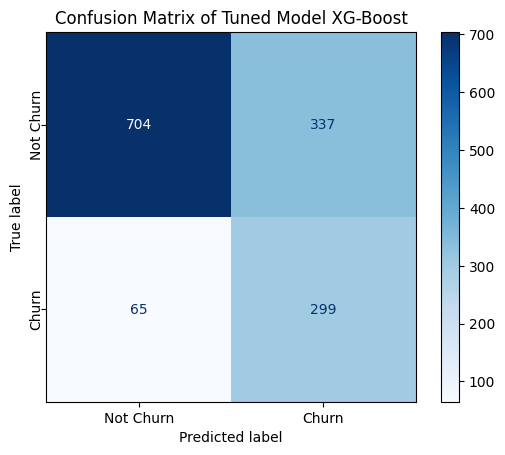

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix untuk model xg-boost yang sudah di-tune
cm_xg = confusion_matrix(target_churncf_test, tuned_pred_smoten_test)

# Tampilkan confusion matrix
xg_display = ConfusionMatrixDisplay(confusion_matrix=cm_xg,
                                      display_labels=['Not Churn', 'Churn'])

plt.figure(figsize=(8, 6))
xg_display.plot(cmap='Blues', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned Model XG-Boost')
plt.show()


Insight :

- Model ini cukup baik dalam mendeteksi pelanggan yang tidak churn yaitu (704). Sedangkan deteksi pelanggan yang churn yang berhasil diprediksi dengan benar yaitu sebanyak (299)
- Namun, model masih menghasilkan cukup banyak prediksi pelanggan yang churn namun aslinya tidak churn yaitu (337), artinya model ini lebih sensitif terhadap churn, sehingga cocok untuk strategi bisnis yang memprioritaskan deteksi dini pelanggan yang beresiko churn meskipun ada konsekuensi salah sasaran.
- Disisi lain, sebanyak 65 pelanggan churn yang tidak dideteksi oleh model sehingga model melabelinya sebagai tidak churn

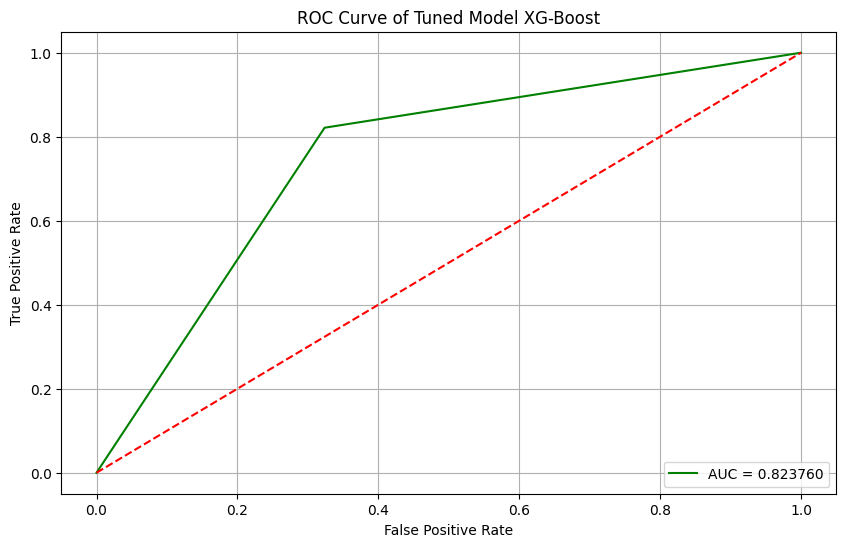

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk model Xg-Boost
xg_fpr, xg_tpr, xg_thresholds = roc_curve(target_churncf_test, tuned_pred_smoten_test)
xg_roc_auc = roc_auc_score(target_churncf_test, tuned_pred_smoten_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(xg_fpr, xg_tpr, color='green', label=f'AUC = {xg_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Tuned Model XG-Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Insight :

Berdasarkan grafik ROC Curve hasil tuned model XGBoost, terlihat bahwa kurva hijau berada jauh di atas garis merah diagonal (baseline random guess), menandakan bahwa model memiliki kemampuan klasifikasi yang jauh lebih baik dibanding tebakan acak. Nilai AUC sebesar 0.8237 menunjukkan performa model yang cukup baik dalam membedakan antara pelanggan churn dan tidak churn. Semakin mendekati nilai 1, semakin baik kemampuan model. Dengan AUC di atas 0.8, model ini dapat dikatakan cukup andal untuk digunakan dalam deteksi churn, meskipun harus dilakukan optimaliasi kembali agar performa model menjadi lebih baik lagi.

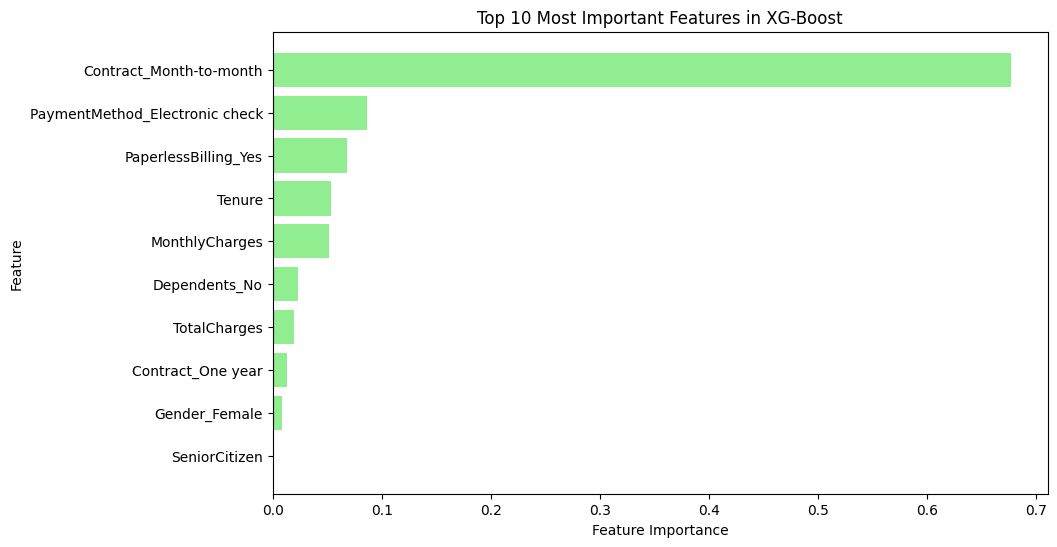

                           Feature  Importance
16         Contract_Month-to-month    0.676839
14  PaymentMethod_Electronic check    0.086837
11            PaperlessBilling_Yes    0.068376
1                           Tenure    0.052952
2                   MonthlyCharges    0.052011
8                    Dependents_No    0.022929
3                     TotalCharges    0.019034
17               Contract_One year    0.012725
4                    Gender_Female    0.008297
0                    SeniorCitizen    0.000000


In [ ]:
# Ambil fitur dan importance dari model XG-Boost
importances = tuned_model_xgb_smoten.named_steps['model'].feature_importances_
feature_names = feature_churncf_train.columns

# Buat DataFrame untuk menampung nilai importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ambil 10 fitur teratas
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in XG-Boost')
plt.gca().invert_yaxis()  # Agar fitur paling penting muncul di atas
plt.show()

# Cetak fitur
print(top_10_features)

Insight :

Berdasarkan grafik Top 10 Most Important Features in XGBoost, terlihat bahwa fitur yang paling berpengaruh dalam memprediksi churn adalah *Contract_Month-to-month*, dengan kontribusi jauh lebih dominan dibanding fitur lainnya. Hal ini menunjukkan bahwa pelanggan dengan kontrak bulanan memiliki risiko churn yang jauh lebih tinggi dibanding kontrak jangka panjang.

## LightGBM

In [ ]:
evaluation_df_lgbm = pd.DataFrame([lgbm_train_metrics, lgbm_test_metrics,
                              tuned_train_metrics, tuned_test_metrics,
                              lgbm_smoten_test_metrics, lgbm_smoten_train_metrics],
                             index = ['Base LightGBM (Train)', 'Base LightGBM (Test)',
                                      'Hyperparameter Tuning LightGBM (Train)', 'Hyperparameter Tuning LightGBM (Test)',
                                      'Hyperparameter Tuning LightGBM menggunakan SMOTEENN (Train)', 'Hyperparameter Tuning LightGBM menggunakan SMOTEENN (Test)'])
evaluation_df_lgbm

,Precision,Recall,F1-Score,ROC AUC
Base LightGBM (Train),0.807630,0.662450,0.727871,0.942349
Base LightGBM (Test),0.598684,0.500000,0.544910,0.826449
Hyperparameter Tuning LightGBM (Train),0.710833,0.567909,0.631384,0.874526
Hyperparameter Tuning LightGBM (Test),0.611296,0.505495,0.553383,0.835289
Hyperparameter Tuning LightGBM menggunakan SMOTEENN (Train),0.498162,0.744505,0.596916,0.821010
Hyperparameter Tuning LightGBM menggunakan SMOTEENN (Test),0.535827,0.791611,0.639076,0.844120


---

Berdasarkan hasil eksperimen dengan LightGBM :
1. Model based awal menunjukkan performa cukup baik dengan F1-score test sebesar (0.54), precision (0.59) dan (AUC 0.82), namun recall masih rendah (0.50) sehingga model kurang optimal dalam menangkap pelanggan yang benar-benar churn.
2. Setelah dilakukan hyperparameter tuning tanpa SMOTEENN, performa test sedikit membaik pada F1-score (0.55), precision (0.61) dan AUC (0.83), meskipun recall masih rendah (0.50), menandakan bahwa diperlukan optimalisasi.
3. Ketika SMOTEENN ditambahkan, recall meningkat signifikan menjadi (0.79) dengan F1-score (0.63), meskipun precision sedikit menurun (0.53), sehingga model menjadi cukup sensitif dalam mendeteksi churn.

Secara keseluruhan, LightGBM dengan SMOTEENN memberikan hasil yang seimbang untuk kasus churn tergantung pada tujuan bisnis.

<Figure size 800x600 with 0 Axes>

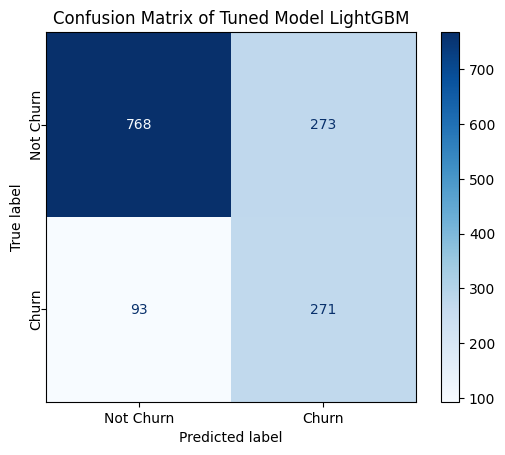

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix untuk model LightGBM yang sudah di-tune
cm_lgbm = confusion_matrix(target_churncf_test, pred_lgbm_smoten_test)

# Tampilkan confusion matrix
lgbm_display = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm,
                                      display_labels=['Not Churn', 'Churn'])

plt.figure(figsize=(8, 6))
lgbm_display.plot(cmap='Blues', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned Model LightGBM')
plt.show()


Insight :

- Model ini cukup baik dalam mendeteksi pelanggan yang tidak churn yaitu (768). Sedangkan deteksi pelanggan yang churn yang berhasil diprediksi dengan benar yaitu sebanyak (271)
- Namun, model masih cukup dalam prediksi pelanggan yang churn namun aslinya tidak churn yaitu (273), artinya model ini tidak terlalu sensitif terhadap churn, tidak seperti model XG-Boost.
- Disisi lain, sebanyak (93) pelanggan churn yang tidak dideteksi oleh model sehingga model melabelinya sebagai tidak churn

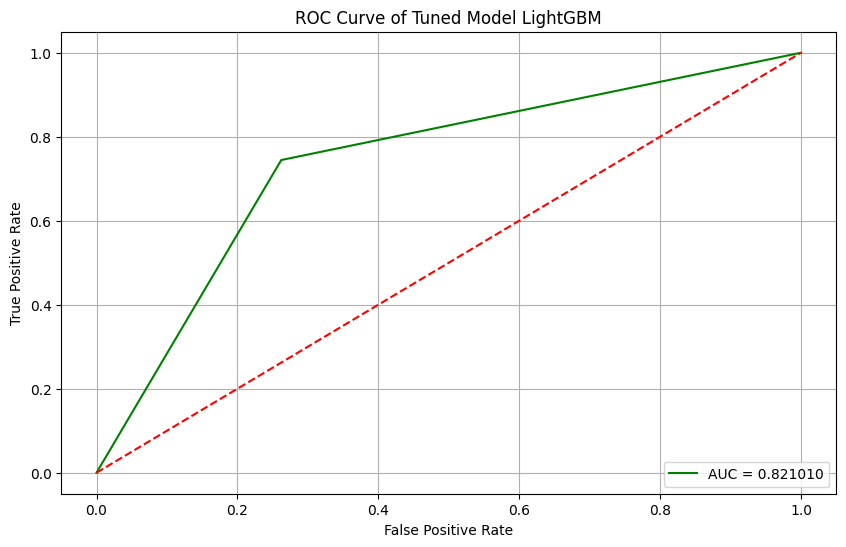

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk model LightGBM
lgbm_fpr, lgbm_tpr, lgbm_thresholds = roc_curve(target_churncf_test, pred_lgbm_smoten_test)
lgbm_roc_auc = roc_auc_score(target_churncf_test, pred_lgbm_smoten_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(lgbm_fpr, lgbm_tpr, color='green', label=f'AUC = {lgbm_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Tuned Model LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Insight :

Berdasarkan grafik ROC Curve hasil tuned model LightGBM, kurva hijau berada cukup jauh di atas garis merah diagonal (baseline random guess), menandakan bahwa model memiliki kemampuan klasifikasi yang lebih baik dibanding tebakan acak. Nilai AUC sebesar 0.8210 menunjukkan performa model yang cukup baik dalam membedakan antara pelanggan churn dan tidak churn. Dengan nilai AUC di atas 0.8, LightGBM bisa dikategorikan sebagai model yang andal, meskipun performanya relatif mirip dengan XGBoost. Artinya, model ini cukup efektif digunakan dalam deteksi churn, meski masih harus dilakukan optimalisasi lagi agar mendapatkan performa model yang lebih baik.

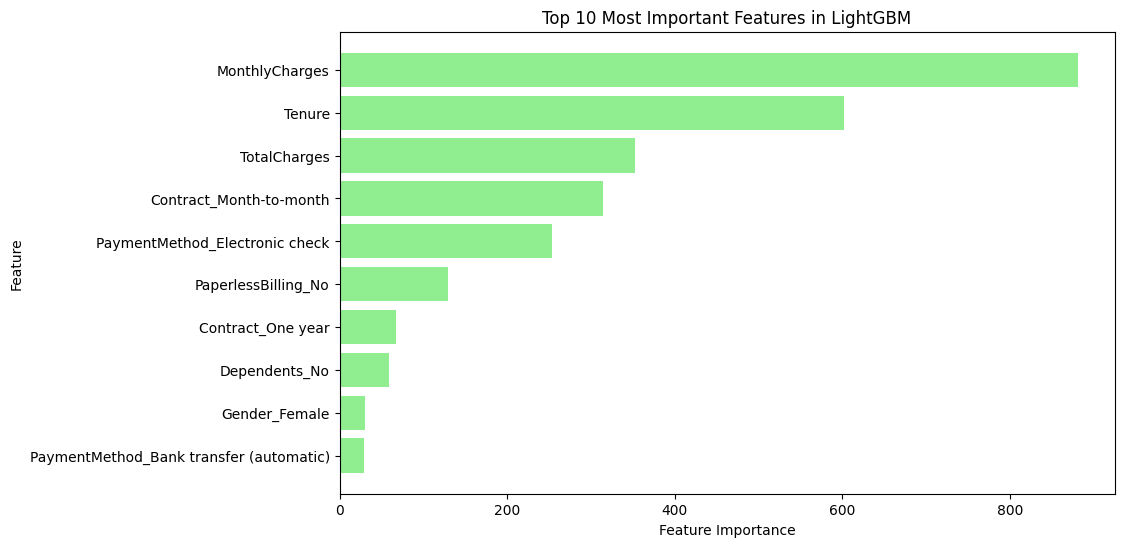

                                    Feature  Importance
2                            MonthlyCharges         881
1                                    Tenure         602
3                              TotalCharges         353
16                  Contract_Month-to-month         315
14           PaymentMethod_Electronic check         254
10                      PaperlessBilling_No         130
17                        Contract_One year          68
8                             Dependents_No          59
4                             Gender_Female          31
12  PaymentMethod_Bank transfer (automatic)          29


In [ ]:
# Ambil fitur dan importance dari model LightGBM
importances = tuned_model_lgbm_smoten.named_steps['model'].feature_importances_
feature_names = feature_churncf_train.columns

# Buat DataFrame untuk menampung nilai importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ambil 10 fitur teratas
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in LightGBM')
plt.gca().invert_yaxis()  # Agar fitur paling penting muncul di atas
plt.show()

# Cetak fitur
print(top_10_features)

Insight :

Berdasarkan grafik Top 10 Most Important Features in LightGBM, fitur yang paling berpengaruh dalam memprediksi churn adalah MonthlyCharges, diikuti oleh Tenure dan TotalCharges. Hal ini menunjukkan bahwa pelanggan dengan biaya bulanan yang tinggi lebih berisiko churn.